Loading sequences: 100%|██████████| 2621/2621 [00:00<00:00, 687423.14it/s]


Features saved to ../dataset/demonstration_samples/GCF_000009645.1/features.pa
function
no_hit                                              846
dna_rna_and_nucleotide_metabolism                   310
transcription_regulation                            231
other                                               214
unknown_function                                    209
head_and_packaging                                  207
moron_auxiliary_metabolic_gene_and_host_takeover    198
lysis                                               170
tail                                                116
integration_and_excision                             73
connector                                            47
Name: count, dtype: int64


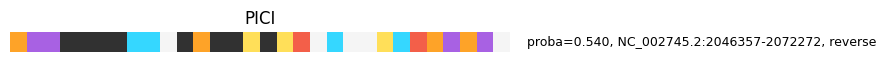

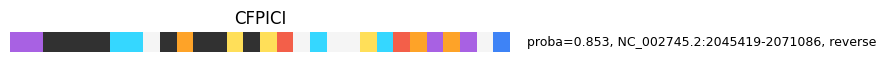

In [1]:
from pici_predictor.utilities import discover_pici

data_dir = "../dataset/demonstration_samples/GCF_000009645.1"
results_dir = "../results/demonstration/GCF_000009645.1"
model_function_path = "../models/best_configs"
model_pici_path = "../models/pici_classifier_model_max30.json"
pici_segments = discover_pici(
    data_dir, results_dir, model_function_path, model_pici_path
)

In [2]:
pici_segments

{'PICI':                                      function_vector  start_idx  end_idx  \
 3  [7, 8, 6, 3, 9, 1, 7, 9, 9, 9, 11, 9, 11, 11, ...        921      892   
 0  [11, 2, 5, 9, 5, 9, 9, 10, 9, 11, 4, 4, 9, 9, ...       1908     1937   
 1  [2, 5, 9, 5, 9, 9, 10, 9, 11, 4, 4, 9, 9, 9, 9...       1909     1938   
 2  [10, 7, 7, 9, 9, 9, 9, 4, 4, 11, 9, 10, 9, 9, ...       1926     1897   
 
    forward predicted_type  predicted_prob  
 3    False           PICI        0.693708  
 0     True           PICI        0.708971  
 1     True           PICI        0.755930  
 2    False           PICI        0.540025  ,
 'CFPICI':                                      function_vector  start_idx  end_idx  \
 0  [7, 7, 9, 9, 9, 9, 4, 4, 11, 9, 10, 9, 9, 5, 9...       1925     1896   
 
    forward predicted_type  predicted_prob  
 0    False         CFPICI          0.8528  ,
 'P4':                                      function_vector  start_idx  end_idx  \
 0  [9, 9, 9, 9, 7, 7, 10, 2, 6, 8, 11,

# true pici

In [3]:
import pandas as pd

annotation = pd.read_parquet("../dataset/Phage_and_Satellites_Pann_Pcat_Pcol.pa")
sample_annotation = annotation[
    annotation["acc"].str.contains("STAU002_0321_00536_C001")
]
# STAU002.0321.00536.C001
sample_vec_function = sample_annotation["pcat"].values
sample_vec_function

array(['head and packaging', 'unknown function', 'head and packaging',
       'unknown function', 'unknown function', 'unknown function',
       'unknown function', 'unknown function',
       'DNA, RNA and nucleotide metabolism',
       'DNA, RNA and nucleotide metabolism', 'unknown function',
       'unknown function', 'unknown function',
       'DNA, RNA and nucleotide metabolism', 'transcription regulation',
       'transcription regulation', 'integration and excision'],
      dtype=object)

In [27]:
import numpy as np
from pici_predictor.phrog_function import (
    function_name_raw_to_num,
    function_num_to_color,
)

sample_vec = pd.Series(sample_vec_function).map(function_name_raw_to_num)
# reverse
sample_vec = np.array(sample_vec)
sample_vec = sample_vec[::-1]
sample_vec

array([10,  7,  7,  4,  9,  9,  9,  4,  4,  9,  9,  9,  9,  9,  5,  9,  5])

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_vector_heatmap(vec, function_num_to_color, save_path=None, title=None):
    """
    Plots a single-line heatmap for a vector using a custom color mapping.

    Args:
        vec (array-like): Vector of function numbers.
        function_num_to_color (dict): Mapping from function number to color code.
        save_path (str, optional): If provided, saves the heatmap to this path.
        title (str, optional): Title for the plot.
    """
    # Map each value in vec directly to its color
    color_row = [function_num_to_color[v] for v in vec]
    # Convert hex colors to RGB
    rgb_row = np.array([mcolors.to_rgb(c) for c in color_row]).reshape(1, -1, 3)

    fig, ax = plt.subplots(figsize=(len(vec) * 0.4, 1))
    ax.imshow(rgb_row, aspect="auto")
    ax.axis("off")
    if title:
        plt.title(title)
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, bbox_inches="tight", pad_inches=0, dpi=300)
    plt.show()
    plt.close()

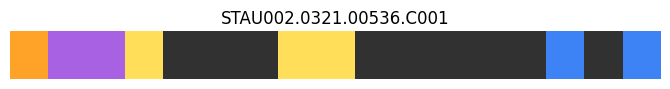

In [33]:
plot_vector_heatmap(
    sample_vec,
    function_num_to_color,
    save_path="../results/demonstration/GCF_000009645.1/heatmap_true_pici.png",
    title="STAU002.0321.00536.C001",
)